<a href="https://colab.research.google.com/github/NguyenVanVuong613/PDF_Etracxt/blob/main/Copy_of_mineru_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# minerU install and use demo

## 1.Install

### 1.1Using CPU

In [2]:
!pip install -U magic-pdf[full] --extra-index-url https://wheels.myhloli.com

Looking in indexes: https://pypi.org/simple, https://wheels.myhloli.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.4/109.4 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.6/541.6 kB 25.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.1/902.1 kB 588.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 52.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 kB 22.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━

In [1]:
!magic-pdf -v

magic-pdf, version 0.8.1


In [ ]:
#!wget https://github.com/opendatalab/MinerU/raw/master/docs/download_models_hf.py && pip install huggingface_hub

In [ ]:
#from huggingface_hub import snapshot_download
#model_dir = snapshot_download('opendatalab/PDF-Extract-Kit')

In [13]:
!git lfs install

Git LFS initialized.


In [14]:
!git lfs clone https://huggingface.co/opendatalab/PDF-Extract-Kit

          with new flags from 'git clone'

'git clone' has been updated in upstream Git to have comparable
speeds to 'git lfs clone'.
Cloning into 'PDF-Extract-Kit'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 94 (delta 27), reused 0 (delta 0), pack-reused 4 (from 1)
Unpacking objects: 100% (94/94), 1.42 MiB | 4.48 MiB/s, done.


In [ ]:
"""
move magic-pdf.template.json under root/
modify "models-dir" in magic-pdf.json
"""
!wget https://github.com/opendatalab/MinerU/raw/master/magic-pdf.template.json && mv magic-pdf.template.json ~/magic-pdf.json && sed -i 's|/tmp/models|{model_dir}|g' ~/magic-pdf.json

### 1.2Using GPU

In [2]:
#!sed -i 's|cpu|cuda|g' ~/magic-pdf.json

sed: can't read /root/magic-pdf.json: No such file or directory


In [ ]:
!pip install paddlepaddle-gpu==3.0.0b1 -i https://www.paddlepaddle.org.cn/packages/stable/cu118/

## 2.Usage

### 2.1Command line

#### **Convert Single PDF**

In [ ]:
!wget https://github.com/opendatalab/MinerU/raw/master/demo/demo1.pdf && wget https://github.com/opendatalab/MinerU/raw/master/demo/demo2.pdf

In [ ]:
!magic-pdf -p /content/test3.pdf -o output2/ -m auto

In [ ]:
!python /content/drive/MyDrive/MinerU/lib/magic_pdf/tools/cli.py -p /content/demo1.pdf -o output/ -m auto

In [ ]:
!export PYTHONPATH=/content/drive/MyDrive/MinerU/lib:$PYTHONPATH

In [9]:
import os
print(os.environ['PYTHONPATH'])

/env/python


In [17]:
os.environ['PYTHONPATH'] = '/content/drive/MyDrive/MinerU/lib:' + os.environ['PYTHONPATH']

In [6]:
!rm -rf /usr/local/lib/python3.10/dist-packages/magic_pdf

In [ ]:
!pip install magic_pdf  # Replace with the correct package name if different


In [ ]:
import os
from PIL import Image
from loguru import logger
from magic_pdf.model import pdf_extract_kit

output_dir = '/content/output_formulas'  # This is within Colab's file system

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Save mf_image_list to the output directory
for idx, img in enumerate(mf_image_list):
    image_filename = os.path.join(output_dir, f"formula_{idx}.png")
    img.save(image_filename)
    print(f"Saved formula image to {image_filename}")


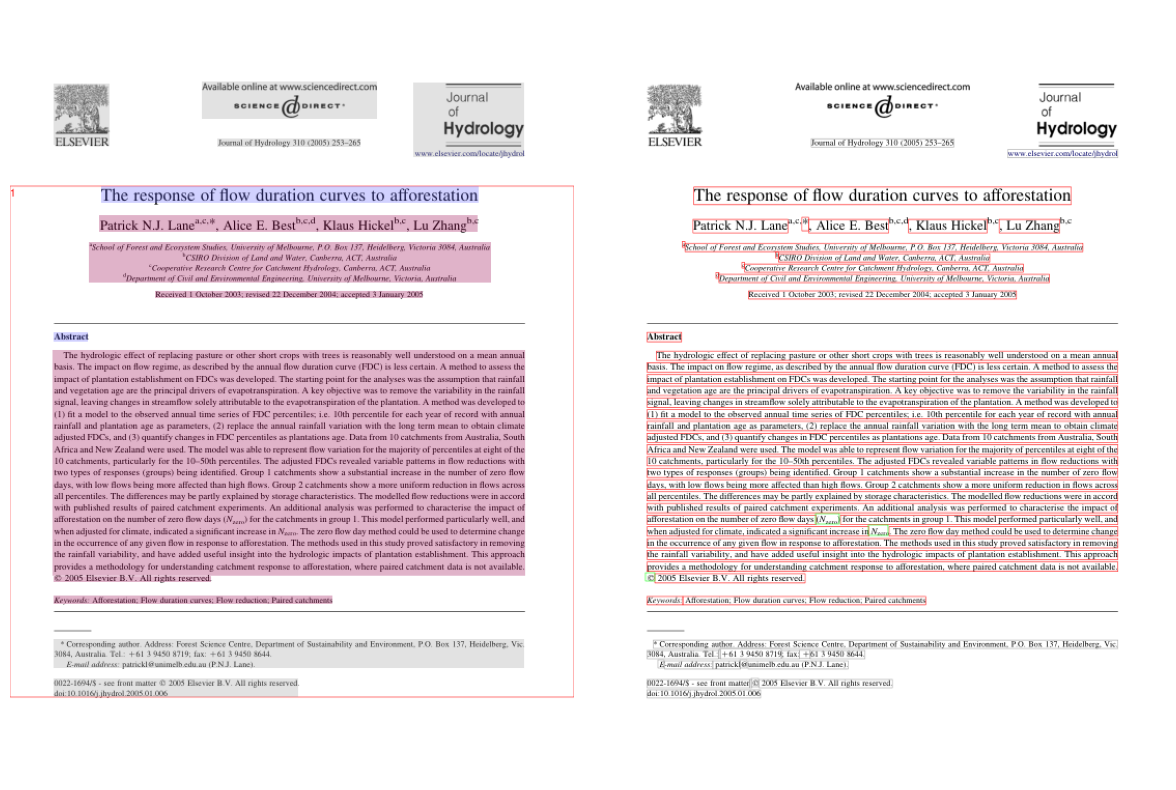

In [25]:
import fitz  # PyMuPDF
import matplotlib.pyplot as plt


import fitz  # PyMuPDF
import matplotlib.pyplot as plt
import numpy as np

# Open the PDF file
# Open the PDF file
layout = "/content/output/demo1/auto/demo1_layout.pdf"
spans = "/content/output/demo1/auto/demo1_spans.pdf"
# Load and render the first page
layout_page_0 = fitz.open(layout).load_page(0)
spans_page_0 = fitz.open(spans).load_page(0)


pix1 = layout_page_0.get_pixmap()
img_array1 = np.frombuffer(pix1.samples, dtype=np.uint8).reshape(pix1.height, pix1.width, pix1.n)

# Load and render the second page
pix2 = spans_page_0.get_pixmap()
img_array2 = np.frombuffer(pix2.samples, dtype=np.uint8).reshape(pix2.height, pix2.width, pix2.n)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Display the first image
axes[0].imshow(img_array1)
axes[0].axis('off')

# Display the second image
axes[1].imshow(img_array2)
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### **Convert Batch PDF**

In [26]:
!find ./ -name "*.pdf" | xargs -I {} magic-pdf -p {} -o output/

Traceback (most recent call last):
  File "/usr/local/bin/magic-pdf", line 5, in <module>
    from magic_pdf.tools.cli import cli
  File "/content/drive/MyDrive/MinerU/lib/magic_pdf/tools/cli.py", line 12, in <module>
    from magic_pdf.tools.common import do_parse, parse_pdf_methods
  File "/content/drive/MyDrive/MinerU/lib/magic_pdf/tools/common.py", line 12, in <module>
    from magic_pdf.pipe.OCRPipe import OCRPipe
  File "/content/drive/MyDrive/MinerU/lib/magic_pdf/pipe/OCRPipe.py", line 4, in <module>
    from magic_pdf.model.doc_analyze_by_custom_model import doc_analyze
  File "/content/drive/MyDrive/MinerU/lib/magic_pdf/model/doc_analyze_by_custom_model.py", line 4, in <module>
    import numpy as np
  File "/usr/local/lib/python3.10/dist-packages/numpy/__init__.py", line 149, in <module>
    from . import lib
  File "/usr/local/lib/python3.10/dist-packages/numpy/lib/__init__.py", line 31, in <module>
    from . import polynomial
  File "<frozen importlib._bootstrap>", line 10

### 2.2API

#### **Simplest Convertion**

In [27]:
"""
convert pdf to markdown and text
"""
from magic_pdf.rw.DiskReaderWriter import DiskReaderWriter
from magic_pdf.pipe.UNIPipe import UNIPipe
import os
pdf_path = "demo1.pdf"
output_dir = "output_api/"
pdf_name = os.path.basename(pdf_path).split(".")[0]
output_path = os.path.join(output_dir, pdf_name)
output_image_path = os.path.join(output_path, 'images')


image_writer = DiskReaderWriter(output_image_path)
image_dir = str(os.path.basename(output_image_path))
jso_useful_key = {"_pdf_type": "", "model_list": []}
pdf_bytes = open(pdf_path, "rb").read()
pipe = UNIPipe(pdf_bytes, jso_useful_key, image_writer)
pipe.pipe_classify()
pipe.pipe_analyze()
pipe.pipe_parse()
md_content = pipe.pipe_mk_markdown(image_dir, drop_mode="none")
print(md_content)

2024-10-08 08:07:22.271 | INFO     | magic_pdf.libs.pdf_check:detect_invalid_chars:57 - cid_count: 7, text_len: 30573, cid_chars_radio: 0.00022927516294913365
2024-10-08 08:07:22.308 | INFO     | magic_pdf.model.pdf_extract_kit:__init__:180 - DocAnalysis init, this may take some times. apply_layout: True, apply_formula: True, apply_ocr: False, apply_table: False
2024-10-08 08:07:22.310 | INFO     | magic_pdf.model.pdf_extract_kit:__init__:188 - using device: cuda
2024-10-08 08:07:22.314 | INFO     | magic_pdf.model.pdf_extract_kit:__init__:190 - using models_dir: /content/PDF-Extract-Kit/models


CustomVisionEncoderDecoderModel init
CustomMBartForCausalLM init
CustomMBartDecoder init
[10/08 08:08:03 detectron2]: Rank of current process: 0. World size: 1
[10/08 08:08:04 detectron2]: Environment info:
-------------------------------  -----------------------------------------------------------------
sys.platform                     linux
Python                           3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
numpy                            1.26.4
detectron2                       0.6 @/usr/local/lib/python3.10/dist-packages/detectron2
Compiler                         GCC 11.4
CUDA compiler                    not available
DETECTRON2_ENV_MODULE            <not set>
PyTorch                          2.3.1+cu121 @/usr/local/lib/python3.10/dist-packages/torch
PyTorch debug build              False
torch._C._GLIBCXX_USE_CXX11_ABI  False
GPU available                    Yes
GPU 0                            Tesla T4 (arch=7.5)
Driver version                   535.104.05
CUDA_H

2024-10-08 08:08:09.993 | INFO     | magic_pdf.model.pdf_extract_kit:__init__:248 - DocAnalysis init done!
2024-10-08 08:08:09.994 | INFO     | magic_pdf.model.doc_analyze_by_custom_model:custom_model_init:98 - model init cost: 47.72086548805237
2024-10-08 08:08:13.910 | INFO     | magic_pdf.model.pdf_extract_kit:__call__:259 - layout detection cost: 3.62



0: 1888x1408 7 embeddings, 234.2ms
Speed: 54.8ms preprocess, 234.2ms inference, 2.0ms postprocess per image at shape (1, 3, 1888, 1408)


2024-10-08 08:08:16.110 | INFO     | magic_pdf.model.pdf_extract_kit:__call__:289 - formula nums: 7, mfr time: 0.88
2024-10-08 08:08:16.958 | INFO     | magic_pdf.model.pdf_extract_kit:__call__:259 - layout detection cost: 0.84



0: 1888x1408 3 embeddings, 215.1ms
Speed: 16.3ms preprocess, 215.1ms inference, 1.6ms postprocess per image at shape (1, 3, 1888, 1408)


2024-10-08 08:08:17.646 | INFO     | magic_pdf.model.pdf_extract_kit:__call__:289 - formula nums: 3, mfr time: 0.43
2024-10-08 08:08:18.512 | INFO     | magic_pdf.model.pdf_extract_kit:__call__:259 - layout detection cost: 0.86



0: 1888x1408 18 embeddings, 2 isolateds, 213.2ms
Speed: 17.4ms preprocess, 213.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1888, 1408)


2024-10-08 08:08:21.122 | INFO     | magic_pdf.model.pdf_extract_kit:__call__:289 - formula nums: 20, mfr time: 2.31
2024-10-08 08:08:22.133 | INFO     | magic_pdf.model.pdf_extract_kit:__call__:259 - layout detection cost: 1.0



0: 1888x1408 32 embeddings, 4 isolateds, 214.0ms
Speed: 22.7ms preprocess, 214.0ms inference, 2.1ms postprocess per image at shape (1, 3, 1888, 1408)


2024-10-08 08:08:24.991 | INFO     | magic_pdf.model.pdf_extract_kit:__call__:289 - formula nums: 36, mfr time: 2.46
2024-10-08 08:08:25.868 | INFO     | magic_pdf.model.pdf_extract_kit:__call__:259 - layout detection cost: 0.87



0: 1888x1408 7 embeddings, 1 isolated, 215.6ms
Speed: 16.9ms preprocess, 215.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1888, 1408)


2024-10-08 08:08:27.749 | INFO     | magic_pdf.model.pdf_extract_kit:__call__:289 - formula nums: 8, mfr time: 1.61
2024-10-08 08:08:28.618 | INFO     | magic_pdf.model.pdf_extract_kit:__call__:259 - layout detection cost: 0.86



0: 1888x1408 6 embeddings, 217.3ms
Speed: 18.0ms preprocess, 217.3ms inference, 1.8ms postprocess per image at shape (1, 3, 1888, 1408)


2024-10-08 08:08:29.097 | INFO     | magic_pdf.model.pdf_extract_kit:__call__:289 - formula nums: 6, mfr time: 0.21
2024-10-08 08:08:29.947 | INFO     | magic_pdf.model.pdf_extract_kit:__call__:259 - layout detection cost: 0.84



0: 1888x1408 20 embeddings, 217.0ms
Speed: 17.8ms preprocess, 217.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1888, 1408)


2024-10-08 08:08:30.929 | INFO     | magic_pdf.model.pdf_extract_kit:__call__:289 - formula nums: 20, mfr time: 0.68
2024-10-08 08:08:31.785 | INFO     | magic_pdf.model.pdf_extract_kit:__call__:259 - layout detection cost: 0.85



0: 1888x1408 7 embeddings, 216.1ms
Speed: 20.4ms preprocess, 216.1ms inference, 1.6ms postprocess per image at shape (1, 3, 1888, 1408)


2024-10-08 08:08:32.377 | INFO     | magic_pdf.model.pdf_extract_kit:__call__:289 - formula nums: 7, mfr time: 0.32
2024-10-08 08:08:33.238 | INFO     | magic_pdf.model.pdf_extract_kit:__call__:259 - layout detection cost: 0.85



0: 1888x1408 15 embeddings, 218.0ms
Speed: 18.4ms preprocess, 218.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1888, 1408)


2024-10-08 08:08:34.206 | INFO     | magic_pdf.model.pdf_extract_kit:__call__:289 - formula nums: 15, mfr time: 0.68
2024-10-08 08:08:35.122 | INFO     | magic_pdf.model.pdf_extract_kit:__call__:259 - layout detection cost: 0.91



0: 1888x1408 1 embedding, 220.4ms
Speed: 24.0ms preprocess, 220.4ms inference, 2.3ms postprocess per image at shape (1, 3, 1888, 1408)


2024-10-08 08:08:35.668 | INFO     | magic_pdf.model.pdf_extract_kit:__call__:289 - formula nums: 1, mfr time: 0.28
2024-10-08 08:08:36.593 | INFO     | magic_pdf.model.pdf_extract_kit:__call__:259 - layout detection cost: 0.92



0: 1888x1408 4 embeddings, 218.0ms
Speed: 23.2ms preprocess, 218.0ms inference, 2.2ms postprocess per image at shape (1, 3, 1888, 1408)


2024-10-08 08:08:37.507 | INFO     | magic_pdf.model.pdf_extract_kit:__call__:289 - formula nums: 4, mfr time: 0.64
2024-10-08 08:08:38.419 | INFO     | magic_pdf.model.pdf_extract_kit:__call__:259 - layout detection cost: 0.9



0: 1888x1408 1 embedding, 217.4ms
Speed: 15.8ms preprocess, 217.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1888, 1408)


2024-10-08 08:08:39.068 | INFO     | magic_pdf.model.pdf_extract_kit:__call__:289 - formula nums: 1, mfr time: 0.4
2024-10-08 08:08:39.913 | INFO     | magic_pdf.model.pdf_extract_kit:__call__:259 - layout detection cost: 0.84



0: 1888x1408 (no detections), 213.0ms
Speed: 21.8ms preprocess, 213.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1888, 1408)


2024-10-08 08:08:40.157 | INFO     | magic_pdf.model.pdf_extract_kit:__call__:289 - formula nums: 0, mfr time: 0.0
2024-10-08 08:08:40.165 | INFO     | magic_pdf.model.doc_analyze_by_custom_model:doc_analyze:136 - doc analyze cost: 29.87322473526001
2024-10-08 08:08:42.175 | INFO     | magic_pdf.pipe.UNIPipe:pipe_mk_markdown:53 - uni_pipe mk mm_markdown finished


# The response of ﬂow duration curves to afforestation  

Patrick N.J. Lane \* , Alice E. Best , Klaus Hickel , Lu Zhang  

a School of Forest and Ecosystem Studies, University of Melbourne, P.O. Box 137, Heidelberg, Victoria 3084, Australia b CSIRO Division of Land and Water, Canberra, ACT, Australia c Cooperative Research Centre for Catchment Hydrology, Canberra, ACT, Australia d Department of Civil and Environmental Engineering, University of Melbourne, Victoria, Australia  

Received 1 October 2003; revised 22 December 2004; accepted 3 January 2005  

# Abstract  

The hydrologic effect of replacing pasture or other short crops with trees is reasonably well understood on a mean annual basis. The impact on ﬂow regime, as described by the annual ﬂow duration curve (FDC) is less certain. A method to assess the impact of plantation establishment on FDCs was developed. The starting point for the analyses was the assumption that rainfall and vegetation age are the principal drivers of ev

#### **Convertion with middle details**

In [ ]:
"""
convert pdf and save middle.json model.json
"""
import copy
import json
def json_md_dump(
        pipe,
        md_writer,
        pdf_name,
        content_list,
        md_content,
):
    # 写入模型结果到 model.json
    orig_model_list = copy.deepcopy(pipe.model_list)
    md_writer.write(
        content=json.dumps(orig_model_list, ensure_ascii=False, indent=4),
        path=f"{pdf_name}_model.json"
    )

    # 写入中间结果到 middle.json
    md_writer.write(
        content=json.dumps(pipe.pdf_mid_data, ensure_ascii=False, indent=4),
        path=f"{pdf_name}_middle.json"
    )

    # text文本结果写入到 conent_list.json
    md_writer.write(
        content=json.dumps(content_list, ensure_ascii=False, indent=4),
        path=f"{pdf_name}_content_list.json"
    )

    # 写入结果到 .md 文件中
    md_writer.write(
        content=md_content,
        path=f"{pdf_name}.md"
    )



md_writer = DiskReaderWriter(output_path)
image_path_parent = os.path.basename(output_image_path)
content_list = pipe.pipe_mk_uni_format(image_path_parent, drop_mode="none")
json_md_dump(pipe, md_writer, pdf_name, content_list, md_content)

#### **Produce Equtation Results and draw bounding boxes with number**

In [ ]:
"""
detect and recognize equations from a pdf page
"""

import fitz  # PyMuPDF
import matplotlib.pyplot as plt


import fitz  # PyMuPDF
import matplotlib.pyplot as plt
import numpy as np
def show_pdf(page0, page1):

  pix1 = page0.get_pixmap()
  img_array1 = np.frombuffer(pix1.samples, dtype=np.uint8).reshape(pix1.height, pix1.width, pix1.n)

  # Load and render the second page
  pix2 = page1.get_pixmap()
  img_array2 = np.frombuffer(pix2.samples, dtype=np.uint8).reshape(pix2.height, pix2.width, pix2.n)

  # Create subplots
  fig, axes = plt.subplots(1, 2, figsize=(12, 8))

  # Display the first image
  axes[0].imshow(img_array1)
  axes[0].axis('off')

  # Display the second image
  axes[1].imshow(img_array2)
  axes[1].axis('off')

  plt.tight_layout()
  plt.show()

In [ ]:
"""
output equations in latex and draw bounding boxes with number on a pdf page
"""
from magic_pdf.libs.Constants import CROSS_PAGE
from magic_pdf.libs.commons import fitz  # PyMuPDF
from magic_pdf.libs.ocr_content_type import ContentType, BlockType, CategoryId
from magic_pdf.model.magic_model import MagicModel
from magic_pdf.libs.draw_bbox import draw_bbox_with_number

pdf_info = pipe.pdf_mid_data["pdf_info"]
text_list = []
inline_equation_list = []
interline_equation_list = []
interline_equation_content_list = []
image_list = []
table_list = []
dropped_list = []
next_page_text_list = []
next_page_inline_equation_list = []

def get_span_info(span):
    if span["type"] == ContentType.Text:
        if span.get(CROSS_PAGE, False):
            next_page_text_list.append(span["bbox"])
        else:
            page_text_list.append(span["bbox"])
    elif span["type"] == ContentType.InlineEquation:
        if span.get(CROSS_PAGE, False):
            next_page_inline_equation_list.append(span["bbox"])
        else:
            page_inline_equation_list.append(span["bbox"])
    elif span["type"] == ContentType.InterlineEquation:
        page_interline_equation_list.append(span["bbox"])
        page_interline_equation_content_list.append(span["content"])
    elif span["type"] == ContentType.Image:
        page_image_list.append(span["bbox"])
    elif span["type"] == ContentType.Table:
        page_table_list.append(span["bbox"])

for page in pdf_info:
    page_text_list = []
    page_inline_equation_list = []
    page_interline_equation_list = []
    page_interline_equation_content_list = []
    page_image_list = []
    page_table_list = []
    page_dropped_list = []

    # 将跨页的span放到移动到下一页的列表中
    if len(next_page_text_list) > 0:
        page_text_list.extend(next_page_text_list)
        next_page_text_list.clear()
    if len(next_page_inline_equation_list) > 0:
        page_inline_equation_list.extend(next_page_inline_equation_list)
        next_page_inline_equation_list.clear()

    # 构造dropped_list
    for block in page["discarded_blocks"]:
        if block["type"] == BlockType.Discarded:
            for line in block["lines"]:
                for span in line["spans"]:
                    page_dropped_list.append(span["bbox"])
    dropped_list.append(page_dropped_list)
    # 构造其余useful_list
    for block in page["para_blocks"]:
        if block["type"] in [
            BlockType.Text,
            BlockType.Title,
            BlockType.InterlineEquation,
        ]:
            for line in block["lines"]:
                for span in line["spans"]:
                    get_span_info(span)
        elif block["type"] in [BlockType.Image, BlockType.Table]:
            for sub_block in block["blocks"]:
                for line in sub_block["lines"]:
                    for span in line["spans"]:
                        get_span_info(span)
    text_list.append(page_text_list)
    inline_equation_list.append(page_inline_equation_list)
    interline_equation_list.append(page_interline_equation_list)
    interline_equation_content_list.append(page_interline_equation_content_list)
    image_list.append(page_image_list)
    table_list.append(page_table_list)

In [ ]:
pdf_docs = fitz.open("pdf", pdf_bytes)
page_no = 3
page = pdf_docs[page_no]
draw_bbox_with_number(page_no, interline_equation_list, page, [0, 0, 255], False)
ori_pdf = "demo1.pdf"
# Load and render the first page
ori_page_i = fitz.open(ori_pdf).load_page(page_no)
show_pdf(ori_page_i, page)
for i, equation in enumerate(interline_equation_content_list[page_no]):
  print(f"{i}: {equation}")

#### **Produce image Results and draw bounding boxes with number**

In [ ]:
pdf_docs = fitz.open("pdf", pdf_bytes)
page_no = 3
page = pdf_docs[page_no]
draw_bbox_with_number(page_no, image_list, page, [0, 0, 255], False)
ori_pdf = "demo1.pdf"
# Load and render the first page
ori_page_i = fitz.open(ori_pdf).load_page(page_no)
show_pdf(ori_page_i, page)

#### **Produce text Results and draw bounding boxes with number**

In [ ]:
pdf_docs = fitz.open("pdf", pdf_bytes)
page_no = 3
page = pdf_docs[page_no]
draw_bbox_with_number(page_no, text_list, page, [0, 0, 255], False)
ori_pdf = "demo1.pdf"
# Load and render the first page
ori_page_i = fitz.open(ori_pdf).load_page(page_no)
show_pdf(ori_page_i, page)

#### **Produce Dropped content and draw bounding boxes with number**

In [ ]:
pdf_docs = fitz.open("pdf", pdf_bytes)
page_no = 3
page = pdf_docs[page_no]
draw_bbox_with_number(page_no, dropped_list, page, [0, 0, 255], False)
ori_pdf = "demo1.pdf"
# Load and render the first page
ori_page_i = fitz.open(ori_pdf).load_page(page_no)
show_pdf(ori_page_i, page)